In [70]:
pip install pandas openpyxl


In [62]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor  # Untuk regresi
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import LabelEncoder

In [3]:
from google.colab import files
uploaded = files.upload()

Saving YIC cafe Revisi.xlsx to YIC cafe Revisi.xlsx


In [4]:
file_name = list(uploaded.keys())[0]  # Mendapatkan nama file yang diunggah
data = pd.ExcelFile(file_name)

In [6]:
print("Sheet names:", data.sheet_names)

Sheet names: ['Sheet2']


In [7]:
df = data.parse('Sheet2')

In [8]:
df_cleaned = df.drop(columns=["Unnamed: 7", "Unnamed: 12", "Income Bulanan"], errors='ignore')

In [9]:
df_cleaned["Quantity"].fillna(0, inplace=True)
df_cleaned["Harga"].fillna(0, inplace=True)
df_cleaned["Total Income"].fillna(0, inplace=True)

<ipython-input-9-384f46ecf244>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_cleaned["Quantity"].fillna(0, inplace=True)
<ipython-input-9-384f46ecf244>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'd

In [10]:
df_cleaned["Produk"].fillna("Unknown", inplace=True)
df_cleaned["Pembeli"].fillna("Unknown", inplace=True)

<ipython-input-10-b00de076f98a>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_cleaned["Produk"].fillna("Unknown", inplace=True)
<ipython-input-10-b00de076f98a>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try 

In [59]:

df_cleaned["stok"].fillna("Unknown", inplace=True) # Baris ini tetap sama.

<ipython-input-59-f1fff6f47447>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_cleaned["stok"].fillna("Unknown", inplace=True) # Baris ini tetap sama.


In [19]:
df_cleaned["Tanggal"] = pd.to_datetime(df_cleaned["Tanggal"], errors='coerce')

In [16]:
print("Data setelah pembersihan:")
print(df_cleaned.info())
print(df_cleaned.head())

Data setelah pembersihan:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 411 entries, 0 to 410
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Hari          351 non-null    object        
 1   Tanggal       351 non-null    datetime64[ns]
 2   Produk        411 non-null    object        
 3   Quantity      411 non-null    float64       
 4   Pembeli       411 non-null    object        
 5   Harga         411 non-null    float64       
 6   Total Income  411 non-null    float64       
 7   Bahan         202 non-null    object        
 8   stok          411 non-null    object        
 9   beli          88 non-null     object        
 10  harga         87 non-null     float64       
dtypes: datetime64[ns](1), float64(4), object(6)
memory usage: 35.4+ KB
None
     Hari    Tanggal      Produk  Quantity Pembeli    Harga  Total Income  \
0  Selasa 2024-02-06  café latte       1.0    cewe  10000.0      

In [17]:
df_cleaned.to_excel("Cleaned_Data.xlsx", index=False)
print("Data yang sudah dibersihkan disimpan sebagai 'Cleaned_Data.xlsx'")

Data yang sudah dibersihkan disimpan sebagai 'Cleaned_Data.xlsx'


In [44]:
data = pd.read_excel("Cleaned_Data.xlsx")


=== Produk Terlaris ===
Produk
café latte     136
cappucino      122
coklat          97
v60             33
coklat          30
Coklat          26
Special v60     22
special v60     17
Café latte       9
cafe latte       8
Cappucino        2
v60              2
Cappunico        1
Unknown          0
Name: Quantity, dtype: int64


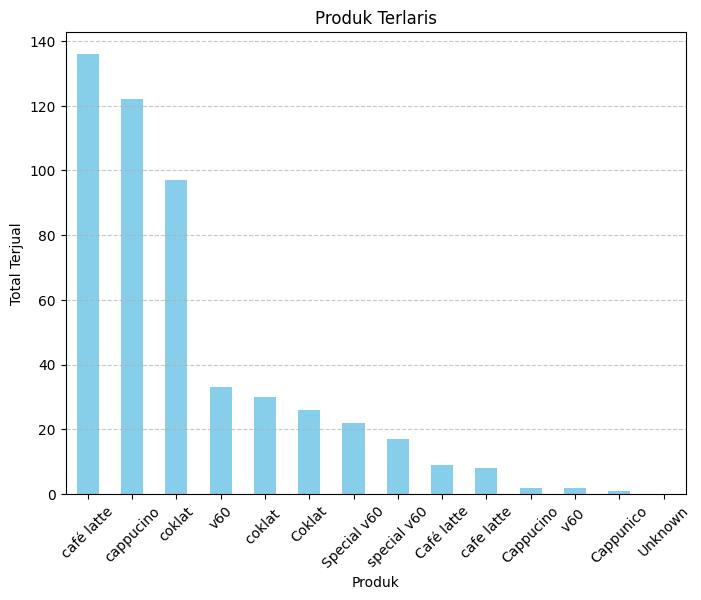

In [46]:
print("\n=== Produk Terlaris ===")
produk_terlaris = data.groupby('Produk')['Quantity'].sum().sort_values(ascending=False)
print(produk_terlaris)
plt.figure(figsize=(8, 6))
produk_terlaris.plot(kind='bar', color='skyblue')
plt.title('Produk Terlaris')
plt.xlabel('Produk')
plt.ylabel('Total Terjual')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


=== Pola Penjualan Harian ===
Hari
Jumat      2972000
Kamis      1530000
Rabu       7144000
Selasa    11057000
kamis       930000
selasa      390000
Name: Total Income, dtype: int64


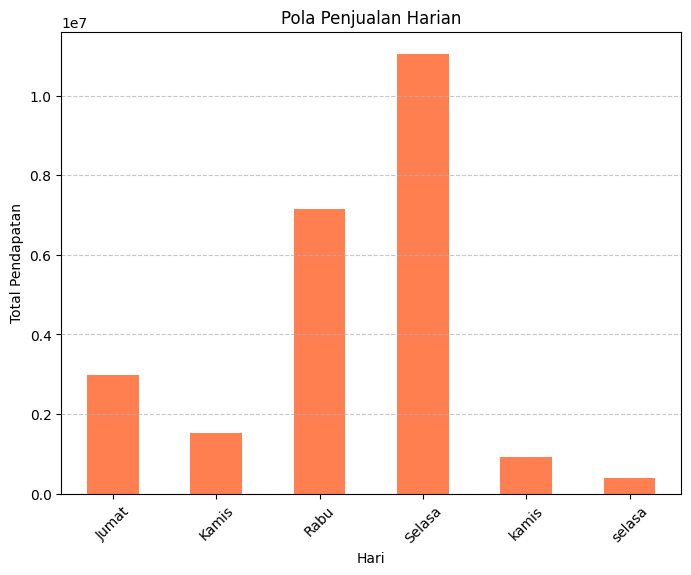

In [48]:
print("\n=== Pola Penjualan Harian ===")
penjualan_harian = data.groupby('Hari')['Total Income'].sum()
print(penjualan_harian)
plt.figure(figsize=(8, 6))
penjualan_harian.plot(kind='bar', color='coral')
plt.title('Pola Penjualan Harian')
plt.xlabel('Hari')
plt.ylabel('Total Pendapatan')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

['cewe' 'cowo' 'Unknown']

=== Profil Pembeli ===
Pembeli
cewe    179
cowo    173
Name: count, dtype: int64


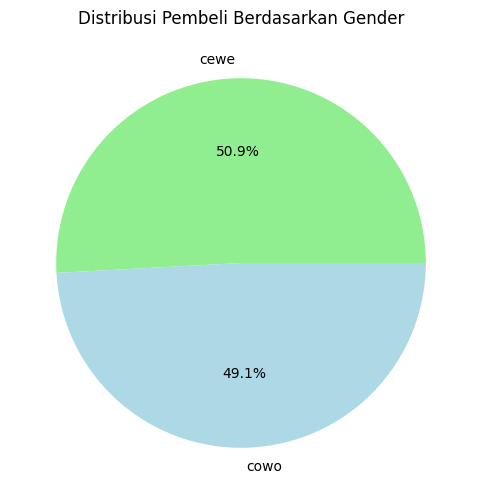

In [84]:
# Cek nilai unik pada kolom 'Pembeli' untuk melihat variasi yang ada
print(data['Pembeli'].unique())

# Membersihkan nilai yang tidak diinginkan (misalnya, menghapus 'unknown' atau nilai yang tidak relevan)
data['Pembeli'] = data['Pembeli'].str.strip().str.lower()  # Menghilangkan spasi dan mengubah ke huruf kecil

# Filter data untuk menghapus kategori 'unknown' dan nilai kosong lainnya
data = data[~data['Pembeli'].isin(['unknown', ''])]  # Menghapus 'unknown' atau nilai kosong

# Menampilkan distribusi pembeli berdasarkan gender
print("\n=== Profil Pembeli ===")
pembeli_gender = data['Pembeli'].value_counts()
print(pembeli_gender)

# Membuat plot pie chart
plt.figure(figsize=(6, 6))
pembeli_gender.plot(kind='pie', autopct='%1.1f%%', colors=['lightgreen', 'lightblue'])
plt.title('Distribusi Pembeli Berdasarkan Gender')
plt.ylabel('')
plt.show()



=== Pembelian Berdasarkan Gender dan Produk ===
Produk   Café latte  Cappucino  Cappunico  Coklat  Special v60  cafe latte  \
Pembeli                                                                      
cewe            6.0        1.0        NaN     6.0          8.0         5.0   
cowo            3.0        1.0        1.0    20.0         14.0         3.0   

Produk   café latte  cappucino  coklat  coklat   special v60   v60  v60   
Pembeli                                                                   
cewe           68.0       72.0    46.0     15.0          5.0  22.0   NaN  
cowo           68.0       50.0    51.0     15.0         12.0  11.0   2.0  


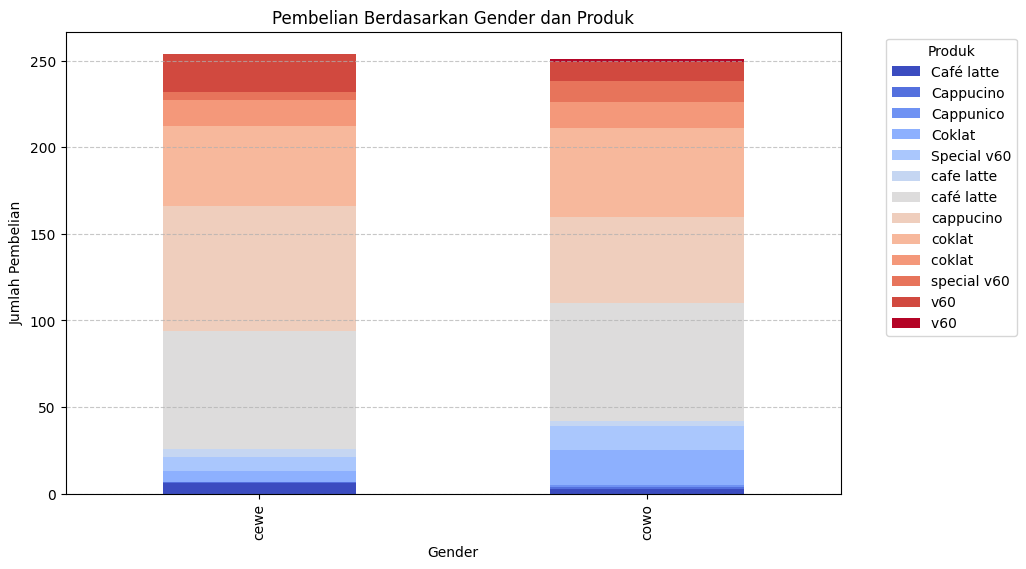

In [61]:
if 'Pembeli' in data.columns and 'Produk' in data.columns:
    # Menormalkan nilai 'Pembeli' (memastikan tidak ada variasi dalam penulisan "unknown")
    data['Pembeli'] = data['Pembeli'].str.strip().str.lower()

    # Filter data untuk menghapus baris dengan 'Pembeli' yang memiliki nilai "unknown"
    data_filtered = data[data['Pembeli'] != 'unknown']

    # Mengelompokkan data berdasarkan 'Pembeli' dan 'Produk', lalu menghitung jumlah 'Quantity'
    pembelian_gender = data_filtered.groupby(['Pembeli', 'Produk'])['Quantity'].sum().unstack()

    print("\n=== Pembelian Berdasarkan Gender dan Produk ===")
    print(pembelian_gender)

    # Plotting
    pembelian_gender.plot(kind='bar', stacked=True, figsize=(10, 6), colormap='coolwarm')
    plt.title('Pembelian Berdasarkan Gender dan Produk')
    plt.xlabel('Gender')
    plt.ylabel('Jumlah Pembelian')
    plt.legend(title='Produk', bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.show()


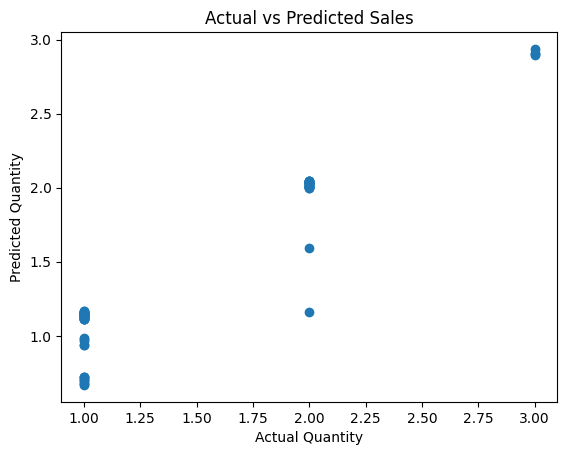

<ipython-input-41-b3800118f055>:35: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  future_dates = pd.date_range(start="2025-01-01", periods=12, freq='M')  # Mengambil 12 bulan ke depan
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


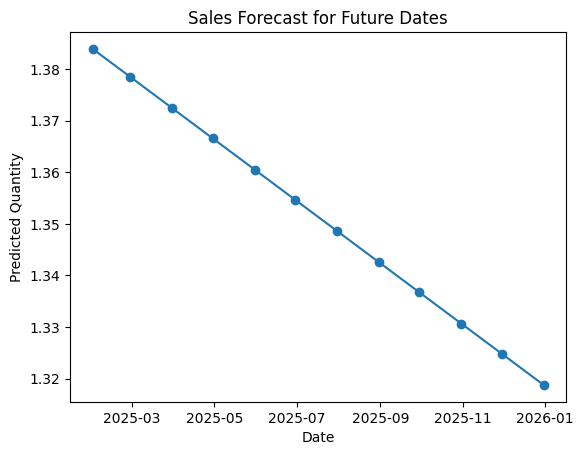

In [41]:
import pandas as pd
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
import numpy as np

# Membaca data
data = pd.read_excel("Cleaned_Data.xlsx")

# Menyiapkan fitur dan target
data['Tanggal'] = pd.to_datetime(data['Tanggal'], errors='coerce')
data = data.dropna(subset=['Tanggal'])  # Menghapus baris dengan Tanggal NaT
data['Tanggal'] = data['Tanggal'].map(lambda x: x.toordinal())  # Mengonversi Tanggal menjadi format numerik

X = data[['Harga', 'Tanggal']]  # Fitur: Harga dan Tanggal
y = data['Quantity']  # Target: Jumlah Terjual

# Membagi data menjadi data latih dan data uji
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Membangun dan melatih model regresi linier
model = LinearRegression()
model.fit(X_train, y_train)

# Prediksi dengan data uji
y_pred = model.predict(X_test)

# Visualisasi hasil prediksi vs aktual
plt.scatter(y_test, y_pred)
plt.xlabel('Actual Quantity')
plt.ylabel('Predicted Quantity')
plt.title('Actual vs Predicted Sales')
plt.show()

# Forecasting untuk periode mendatang (misalnya, tanggal di masa depan)
future_dates = pd.date_range(start="2025-01-01", periods=12, freq='M')  # Mengambil 12 bulan ke depan
future_dates_ord = future_dates.map(lambda x: x.toordinal()).values.reshape(-1, 1)  # Mengonversi ke ordinal

# Prediksi untuk bulan-bulan mendatang
predicted_sales = model.predict(np.hstack([np.full_like(future_dates_ord, np.mean(X_train['Harga'])), future_dates_ord]))

# Visualisasi hasil forecasting
plt.plot(future_dates, predicted_sales, marker='o', label="Forecasted Sales")
plt.xlabel('Date')
plt.ylabel('Predicted Quantity')
plt.title('Sales Forecast for Future Dates')
plt.show()

